<a href="https://colab.research.google.com/github/Mrinalkumar1/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1114]:
import warnings
warnings.filterwarnings('ignore')

In [1115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [1116]:
df = pd.read_csv('/content/drive/MyDrive/ML Projects /Car Price Prediction/cars.csv')

In [1117]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [1118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [1119]:
for col in df:
    print(col)
    print(df[col].unique())
    print("\n")

symboling
[ 3  1  2  0 -1 -2]


normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type
['gas' 'diesel']


body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drive-wheels
['rwd' 'fwd' '4wd']


engine-location
['front' 'rear']


width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]


height
[48.8 52.4 54.3

The columns 'horsepower' and 'normalized-losses' have unreadable values (?) so we will have to deal with it. 
We are going to replace them with nan and then replace the nan with mean of those two columns. 





**Checking null values**

In [1120]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There are no null values in our dataset.

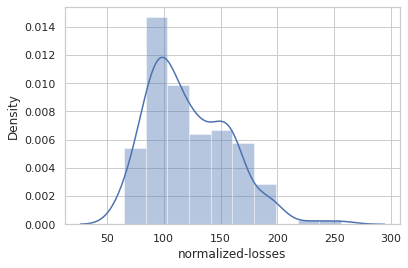

In [1121]:
df['normalized-losses'].replace("?", np.nan, inplace=True)
df['normalized-losses'] = df['normalized-losses'].astype('float64')
sns.distplot(df['normalized-losses'])
plt.show()

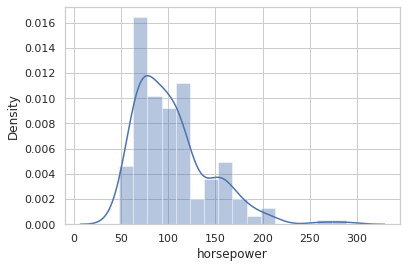

In [1122]:
df['horsepower'].replace("?", np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype('float64')
sns.distplot(df['horsepower'])
plt.show()

Since the data seems to be normally distributed hence we can use mean to replace "?" values

In [1123]:
from scipy.stats import skew
df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [1124]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


The "?" and "nan" values have been fixed and we can proceed further. 

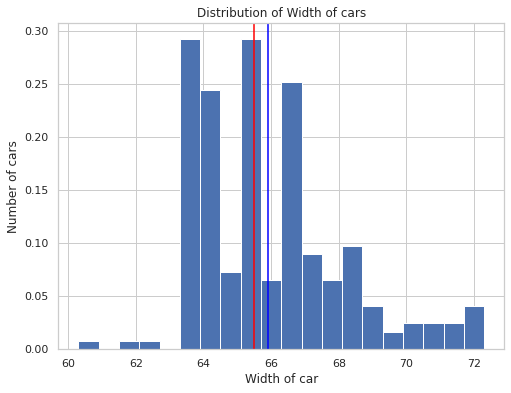

In [1125]:
plt.figure(figsize=(8,6))
plt.hist(df['width'], bins=20, density=True, cumulative=False, histtype='bar', stacked=False)
plt.axvline(df['width'].mean(), color='blue')
plt.axvline(df['width'].median(), color='red')
plt.xlabel('Width of car')
plt.ylabel('Number of cars')
plt.title('Distribution of Width of cars')
plt.show()

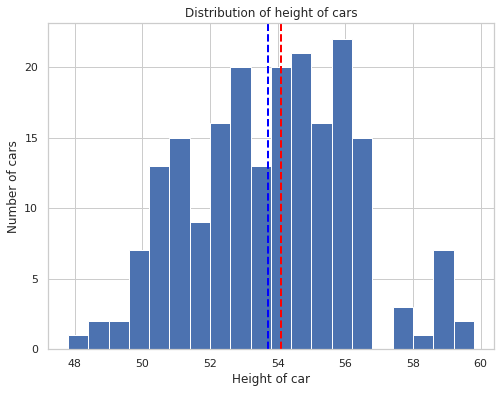

In [1126]:
plt.figure(figsize=(8,6))
plt.hist(df['height'], bins=20, density=False, cumulative=False, histtype='bar', stacked=False)
plt.axvline(df['height'].mean(), color='blue',linestyle='--', linewidth=2)
plt.axvline(df['height'].median(), color='red',linestyle='--', linewidth=2)
plt.xlabel('Height of car')
plt.ylabel('Number of cars')
plt.title('Distribution of height of cars')
plt.show()

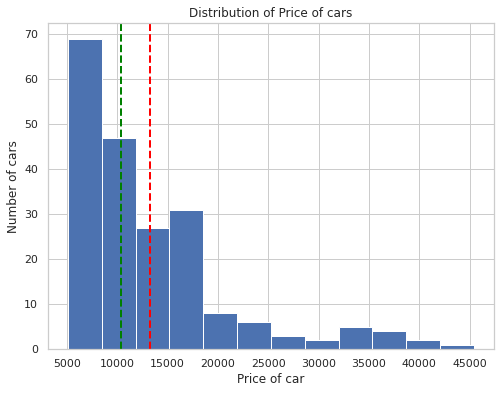

In [1127]:
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=12)
plt.axvline(df['price'].mean() , c='red', linestyle='--', linewidth=2)
plt.axvline(df['price'].median() , c='green', linestyle='--', linewidth=2)
plt.xlabel('Price of car')
plt.ylabel('Number of cars')
plt.title('Distribution of Price of cars')
plt.show()

As we can see price of the car is not normally distributed so we will look more into each and every column of our dataset and fix the distribution. 

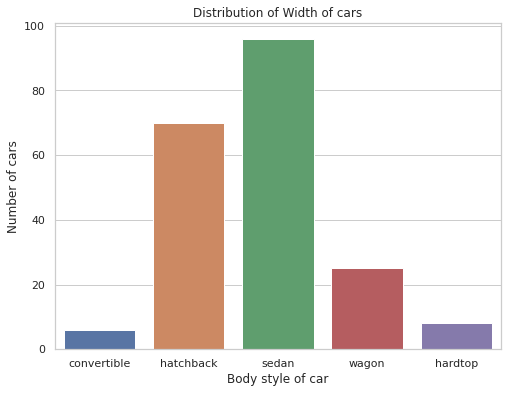

In [1128]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='body-style')
plt.xlabel('Body style of car')
plt.ylabel('Number of cars')
plt.title('Distribution of Width of cars')
plt.show()

Most of the cars are Sedan and Hatchback

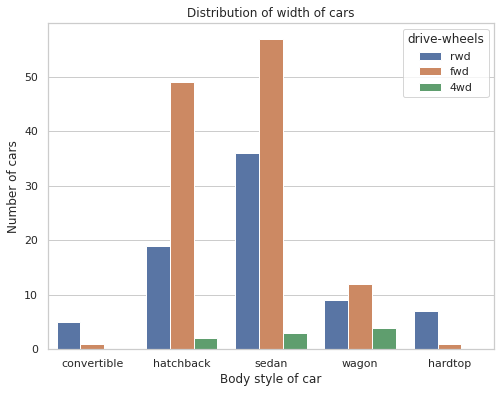

In [1129]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='body-style', hue='drive-wheels')
plt.xlabel('Body style of car')
plt.ylabel('Number of cars')
plt.title('Distribution of width of cars')
plt.show()

As we can see 4wd cars are very less in number

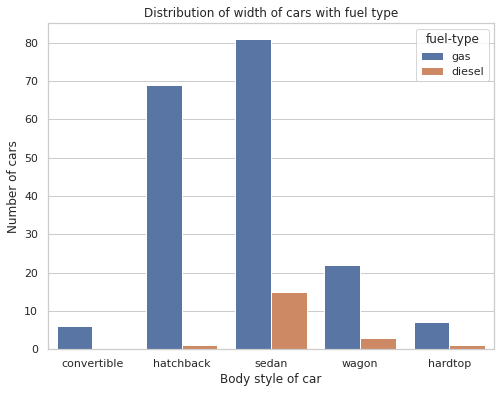

In [1130]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='body-style', hue='fuel-type')
plt.xlabel('Body style of car')
plt.ylabel('Number of cars')
plt.title('Distribution of width of cars with fuel type')
plt.show()

Most of the cars run on gas. Diesel cars seem to be very less. 

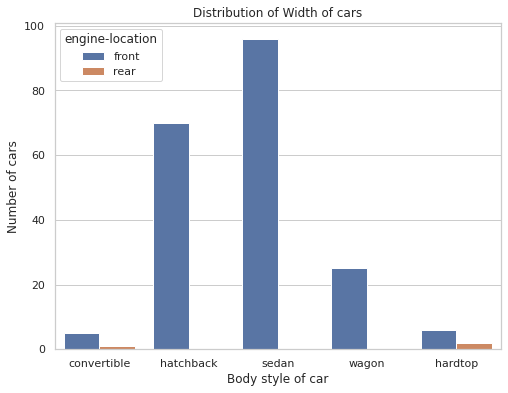

In [1131]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='body-style', hue='engine-location')
plt.xlabel('Body style of car')
plt.ylabel('Number of cars')
plt.title('Distribution of Width of cars')
plt.show()

We can see that rear wheel drive cars are very less compared to front wheel drive

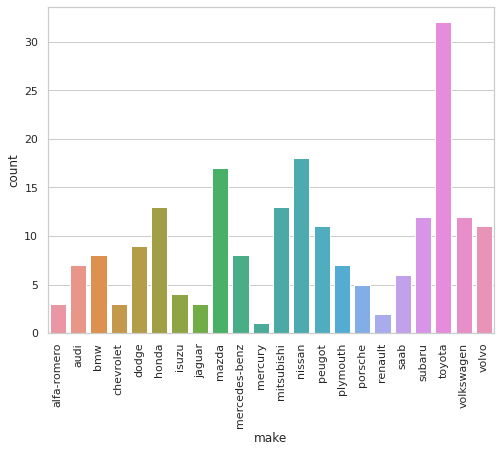

In [1132]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='make')
plt.xticks(rotation=90)
plt.show()

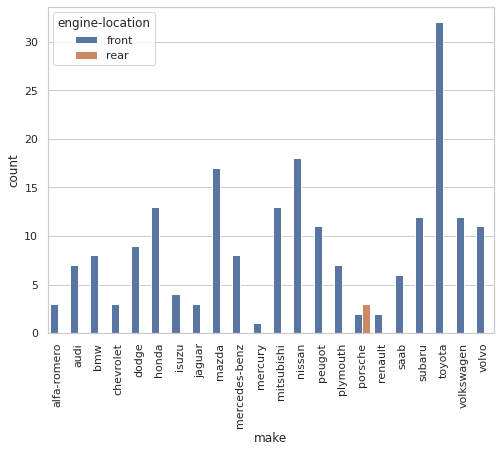

In [1133]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='make', hue='engine-location')
plt.xticks(rotation=90)
plt.show()

From this graph we find that only Porsche has engine at the rear end. 

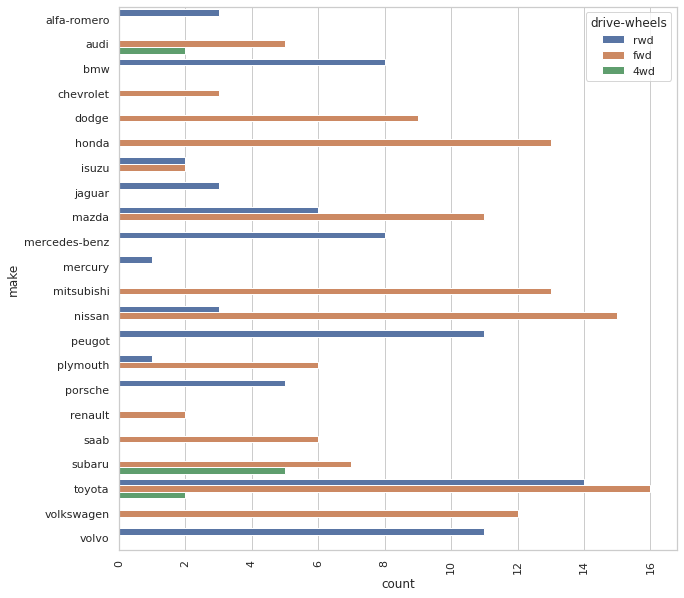

In [1134]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='make', hue='drive-wheels')
plt.xticks(rotation=90)
plt.show()

<Figure size 720x720 with 0 Axes>

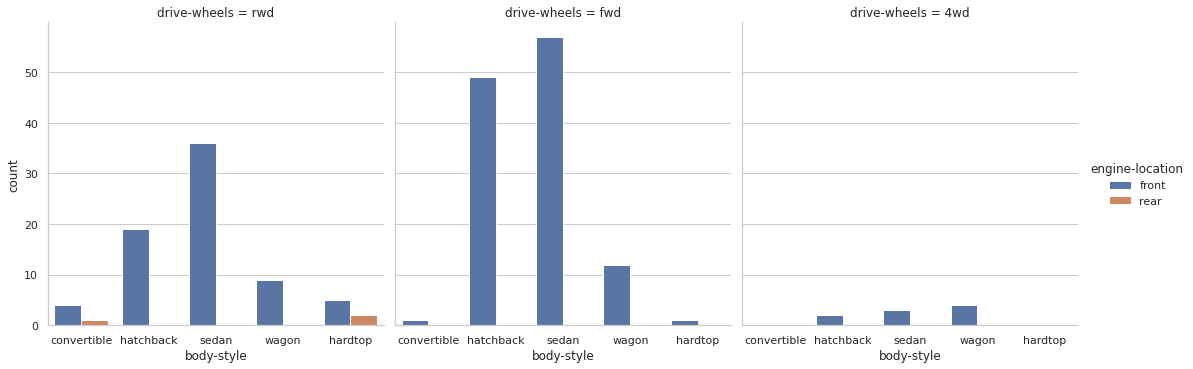

In [1135]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x='body-style', col='drive-wheels', hue='engine-location', kind="count")
plt.show()

Only convertible and hardtop body-style cars have Engine location as rear. 

<Figure size 720x720 with 0 Axes>

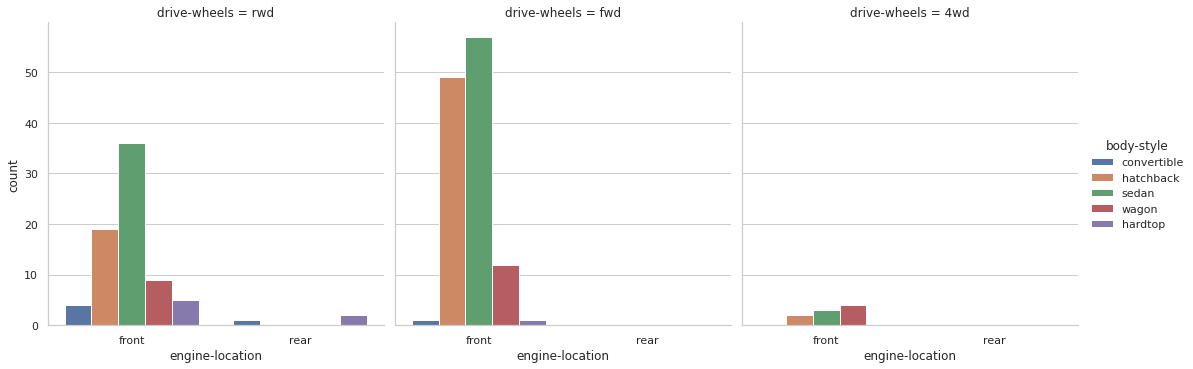

In [1136]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x='engine-location', col='drive-wheels', hue='body-style', kind="count")
plt.show()

Only rear wheel drive cars have engine location = rear. 

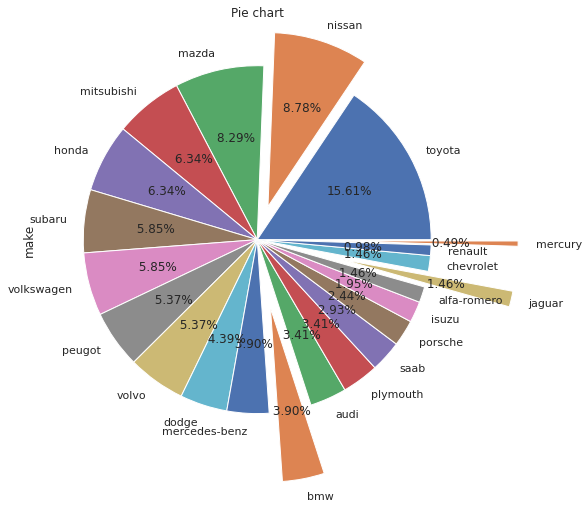

In [1137]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
df['make'].value_counts().plot(kind='pie', autopct="%5.2f%%",explode=(0,0.2,0,0,0,0,0,0,0,0,0,0.4,0,0,0,0,0,0,0.5,0,0,0.5))
plt.title("Pie chart")
plt.show()

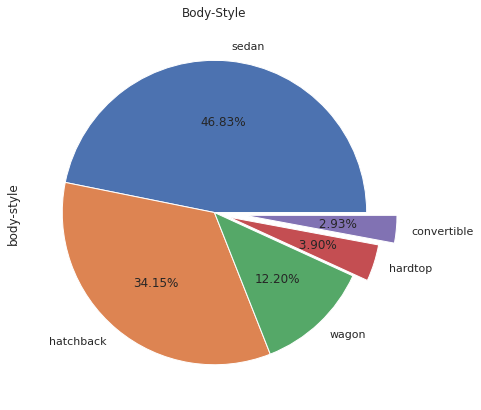

In [1138]:
plt.figure(figsize=(7,7))
sns.set(style='darkgrid')
df['body-style'].value_counts().plot(kind='pie',autopct="%5.2f%%", explode=(0,0,0,0.1,0.2))
plt.title("Body-Style")
plt.show()

In [1139]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


Separating our categorical data and numerical data for further analysis.

In [1140]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['int64','float64'])

In [1141]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [1142]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


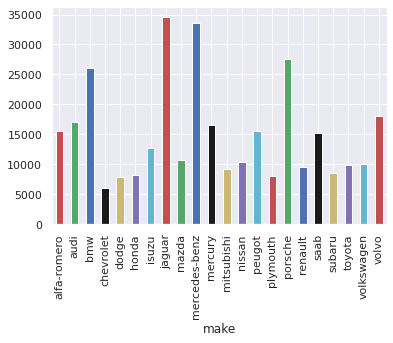

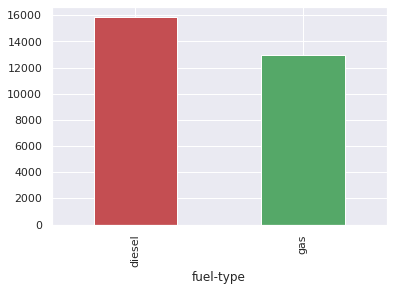

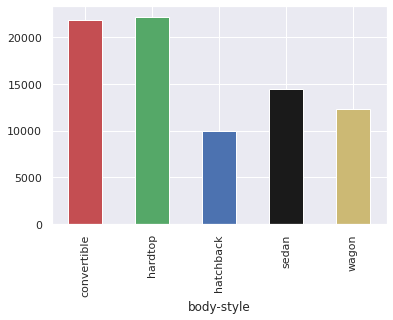

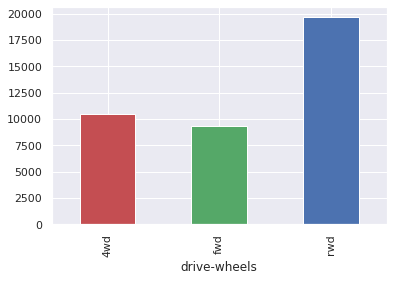

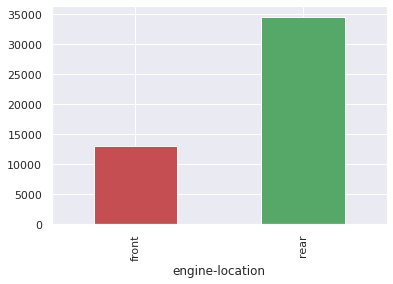

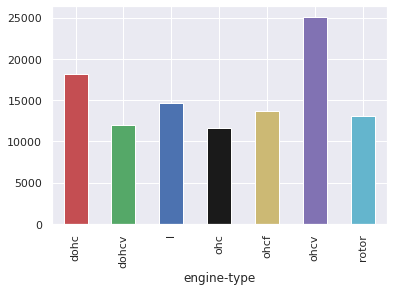

In [1143]:
my_colors = list('rgbkymc') 
data = df.copy()
for feature in df_cat:
    data.groupby(feature)['price'].mean().plot(kind='bar',color=my_colors)
    plt.show()

From the above graph we understand -
1. Diesel cars are more expensive than gas cars
2. Convertibles and hardtop are the most expensive body-style
3. Surprisingly rwd cars cost more than 4wd
4. Cars are more expensive when the engine location is rear
5. Top 4 expensive car brands: Jaguar, Mercedes-Benz, Porsche, BMW

In [1144]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import skew
from scipy import stats

We will use LabelEncoder to make our categorical data in numerical form so we can analyze it.

In [1145]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [1146]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   make             205 non-null    int64
 1   fuel-type        205 non-null    int64
 2   body-style       205 non-null    int64
 3   drive-wheels     205 non-null    int64
 4   engine-location  205 non-null    int64
 5   engine-type      205 non-null    int64
dtypes: int64(6)
memory usage: 9.7 KB


In [1147]:
data = df.copy()
categorical_features = [feature for feature in df_cat.columns if df_cat[feature].dtypes != 'O']
categorical_heatmap = [feature for feature in data.columns if feature in categorical_features + ['price']]
data[categorical_heatmap].head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,price
0,alfa-romero,gas,convertible,rwd,front,dohc,13495
1,alfa-romero,gas,convertible,rwd,front,dohc,16500
2,alfa-romero,gas,hatchback,rwd,front,ohcv,16500
3,audi,gas,sedan,fwd,front,ohc,13950
4,audi,gas,sedan,4wd,front,ohc,17450


In [1148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [1149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_heatmap:
    if data[feature].dtypes=='O':
        data[feature] = le.fit_transform(data[feature])
    else:
        pass
data[categorical_heatmap].head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,price
0,0,1,0,2,0,0,13495
1,0,1,0,2,0,0,16500
2,0,1,2,2,0,5,16500
3,1,1,3,1,0,3,13950
4,1,1,3,0,0,3,17450


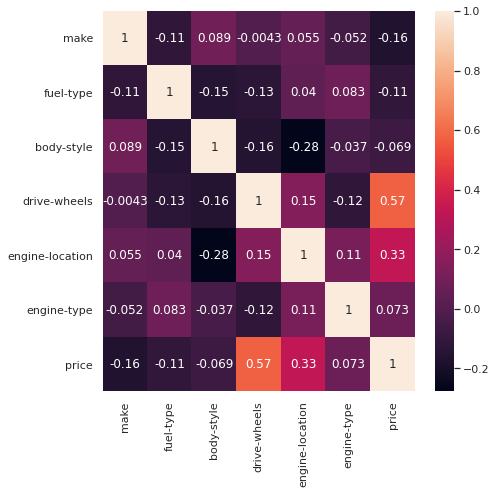

In [1150]:
plt.figure(figsize=(7,7))
sns.heatmap(data[categorical_heatmap].corr(), annot=True, robust=True)
plt.show()

1. Engine location and drive-wheels have high correlation with target column ie price.
2. Make and Fuel-type have low correlation with target column ie price.


Now merging both categorical and numerical data so we can check their correlation against our output variable price. 

symboling

Skew:  0.20952469094997359


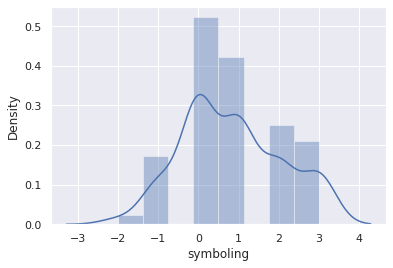



normalized-losses

Skew:  0.8485348696008058


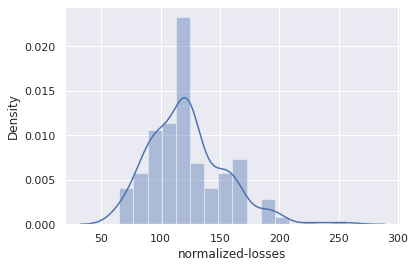



width

Skew:  0.8973753485201392


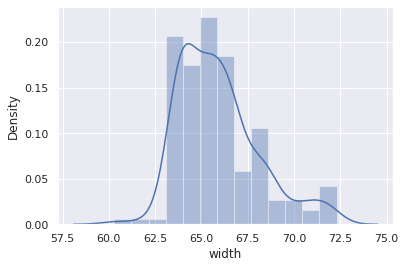



height

Skew:  0.06265991683394276


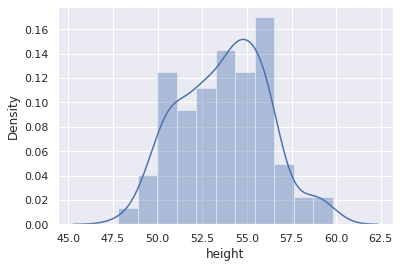



engine-size

Skew:  1.9333748457840114


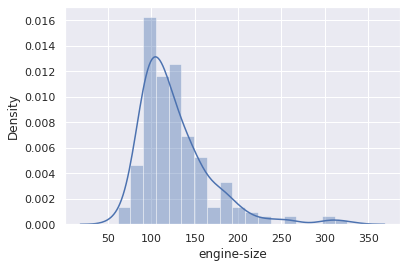



horsepower

Skew:  1.3875147343096037


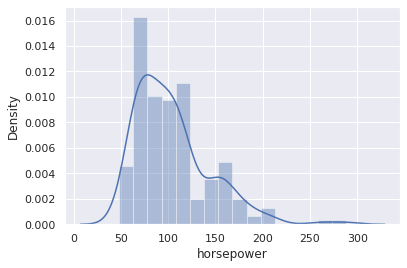



city-mpg

Skew:  0.6588377533622138


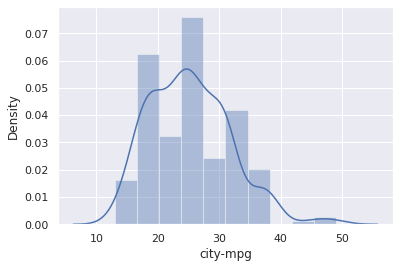



highway-mpg

Skew:  0.5360379305163596


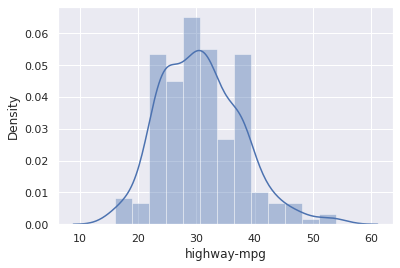

In [1151]:
for col in df_num.drop('price', axis=1):
    print(col)
    print("\nSkew: ",skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
    print("\n")

**Handling Outliers**

In order to normalize and make an accurate model first we will handle the outliers then we will use log to get the right skew value. 

In [1152]:
data = df.copy()

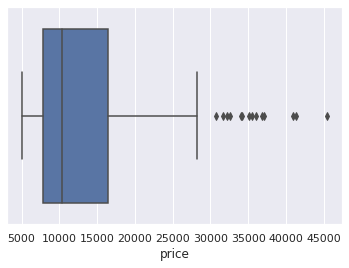

In [1153]:
sns.boxplot(data=data, x='price')
plt.show()

Let us find the % of outliers.

In [1154]:
#First find the upper whisker

q1_price = data['price'].quantile(0.25)
q3_price = data['price'].quantile(0.75)
IQR = q3_price - q1_price
uw = q3_price + IQR*1.5
lw = q1_price - IQR*1.5
print("Inter quantile range: ", IQR)
print("Lower whisker: ",lw)
print("Upper whisker: ",uw)

Inter quantile range:  8712.0
Lower whisker:  -5280.0
Upper whisker:  29568.0


In [1155]:
print(round(len(data[data['price']>29568])/len(data),3),"% of values are outliers")

0.068 % of values are outliers


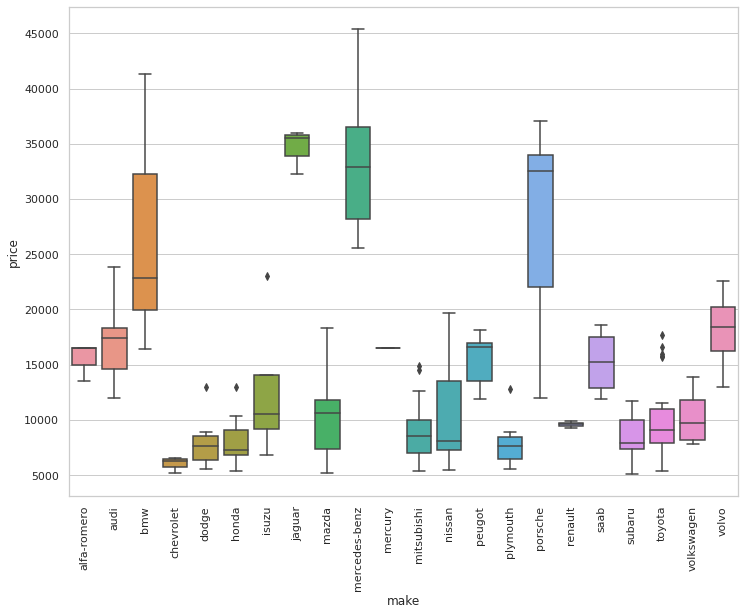

In [1156]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,9))
sns.boxplot(data=data, x='make', y='price')
plt.xticks(rotation=90)
plt.show()

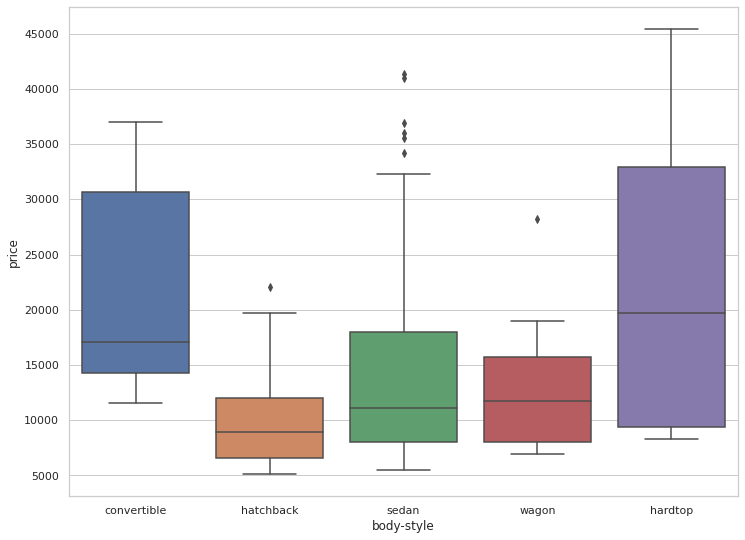

In [1157]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,9))
sns.boxplot(data=data, x='body-style', y='price')
plt.show()

In [1158]:
data[(data['body-style']=='hatchback') & (data['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
125,3,186.0,porsche,gas,hatchback,rwd,front,68.3,50.2,ohc,151,143.0,19,27,22018


In [1159]:
data[(data['body-style']=='sedan') & (data['price']>32500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
16,0,122.0,bmw,gas,sedan,rwd,front,67.9,53.7,ohc,209,182.0,16,22,41315
17,0,122.0,bmw,gas,sedan,rwd,front,70.9,56.3,ohc,209,182.0,15,20,36880
48,0,122.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,35550
49,0,122.0,jaguar,gas,sedan,rwd,front,70.6,47.8,ohcv,326,262.0,13,17,36000
71,-1,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.5,ohcv,234,155.0,16,18,34184
73,0,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.7,ohcv,308,184.0,14,16,40960


In [1160]:
data[(data['body-style']=='wagon') & (data['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
68,-1,93.0,mercedes-benz,diesel,wagon,rwd,front,70.3,58.7,ohc,183,123.0,22,25,28248


As the outliers are very less in number hence we can get rid of them.

In [1161]:
data.drop([125,16,17,48,49,71,73,68], axis=0, inplace=True)

In [1162]:
#data = data[data['price']<29568]

print("Number of rows before outlier treatment:{}".format(len(df)))
print("Number of rows after outlier treatment:{}".format(len(data)))

Number of rows before outlier treatment:205
Number of rows after outlier treatment:197


*We cannot drop the records based on outliers we are getting from just the price column since for different company there is going to be different outlier threshold (Upper whisker).*

*The price that will be considered as an outlier for a small company can be price of an average car in top companies such as Porsche, Jaguar.*

*Hence we will get rid of these outliers based on their body-style. That is the best way to deal with it.*

In [1163]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical feature: \n",numerical_feature)

Numerical feature: 
 ['symboling', 'normalized-losses', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']


normalized-losses
Skew: 0.03181633596288615


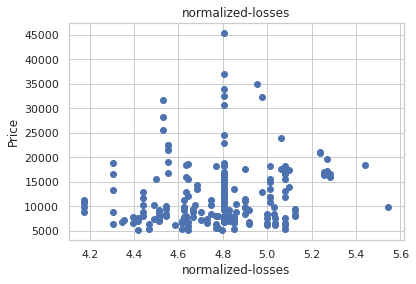

width
Skew: 0.8269255171854949


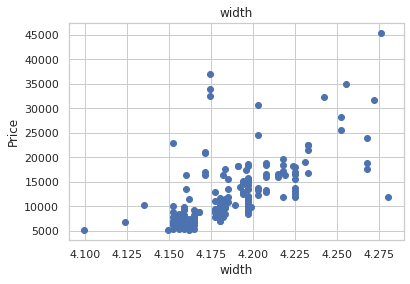

engine-size
Skew: 0.6372813478609946


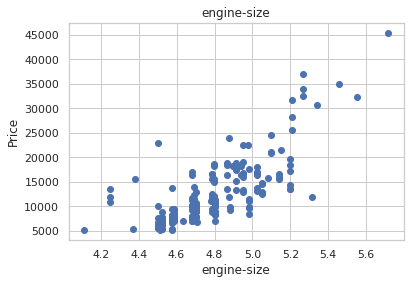

horsepower
Skew: 0.47476235742471723


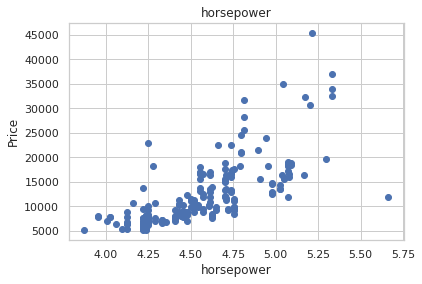

city-mpg
Skew: 0.07807712119531407


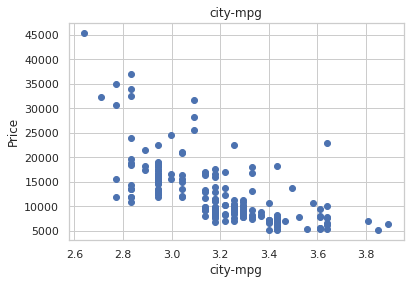

highway-mpg
Skew: 0.03454206635828007


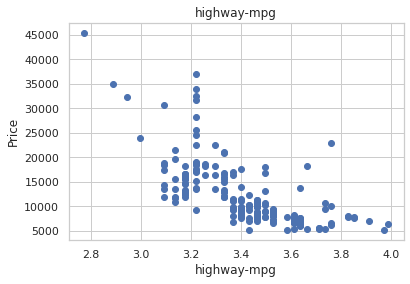

price
Skew: 0.6097071401401143


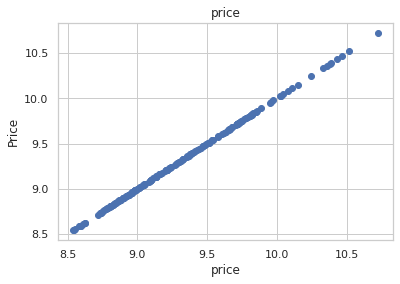

In [1164]:
for feature in numerical_feature:
    
    if skew(data[feature]) > 0.5 or skew(data[feature]) < -0.5:
        if 0 in data[feature].unique():
            pass
        else:
            data[feature] = np.log(data[feature])
            print(feature)
            print("Skew: {}".format(skew(data[feature])))
            plt.scatter(x=data[feature], y=data['price'])
            plt.xlabel(feature)
            plt.ylabel('Price')
            plt.title(feature)
            plt.show()

After observing the scatter plot we realize that
1. Width, horsepower, engine-size affect the price hence these columns are really important.
2. The higher the mileage the lower the price (high negative correlation).
3. Skewness of columns fixed. 
Most of the data is normally distributed now. 

In [1165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalized-losses  197 non-null    float64
 2   make               197 non-null    object 
 3   fuel-type          197 non-null    object 
 4   body-style         197 non-null    object 
 5   drive-wheels       197 non-null    object 
 6   engine-location    197 non-null    object 
 7   width              197 non-null    float64
 8   height             197 non-null    float64
 9   engine-type        197 non-null    object 
 10  engine-size        197 non-null    float64
 11  horsepower         197 non-null    float64
 12  city-mpg           197 non-null    float64
 13  highway-mpg        197 non-null    float64
 14  price              197 non-null    float64
dtypes: float64(8), int64(1), object(6)
memory usage: 24.6+ KB


In [1166]:
le = LabelEncoder()
for feature in data:
    if data[feature].dtypes == 'O':
        data[feature] = le.fit_transform(data[feature])

In [1167]:
data.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,3.044522,3.295837,9.510075
1,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,3.044522,3.295837,9.711116
2,1,4.804021,0,1,2,2,0,4.182050,52.4,5,5.023881,5.036953,2.944439,3.258097,9.711116
3,2,5.099866,1,1,3,1,0,4.192680,54.3,3,4.691348,4.624973,3.178054,3.401197,9.543235
4,2,5.099866,1,1,3,0,0,4.195697,54.3,3,4.912655,4.744932,2.890372,3.091042,9.767095


**HeatMap**

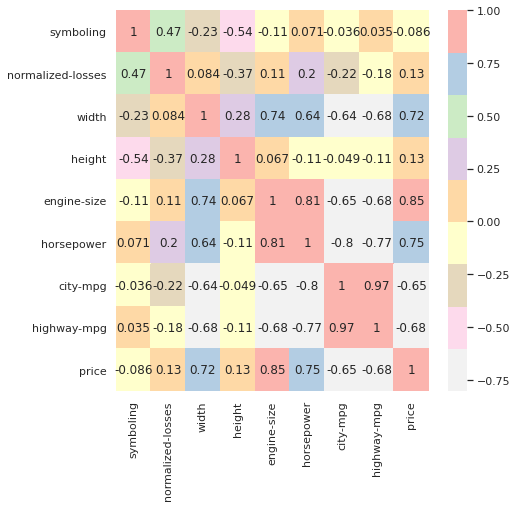

In [1168]:
plt.figure(figsize=(7,7))
sns.heatmap(df_num.corr(), annot=True, cmap='Pastel1_r')
plt.show()

1. The columns such as width, engine-size, horsepower have high positive correlation
2. Height, normalized-losses have low positive-correlation
3. Mileage of the car affects the price (high negative correlation)

In [1169]:
data.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,3.044522,3.295837,9.510075
1,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,3.044522,3.295837,9.711116
2,1,4.804021,0,1,2,2,0,4.182050,52.4,5,5.023881,5.036953,2.944439,3.258097,9.711116
3,2,5.099866,1,1,3,1,0,4.192680,54.3,3,4.691348,4.624973,3.178054,3.401197,9.543235
4,2,5.099866,1,1,3,0,0,4.195697,54.3,3,4.912655,4.744932,2.890372,3.091042,9.767095


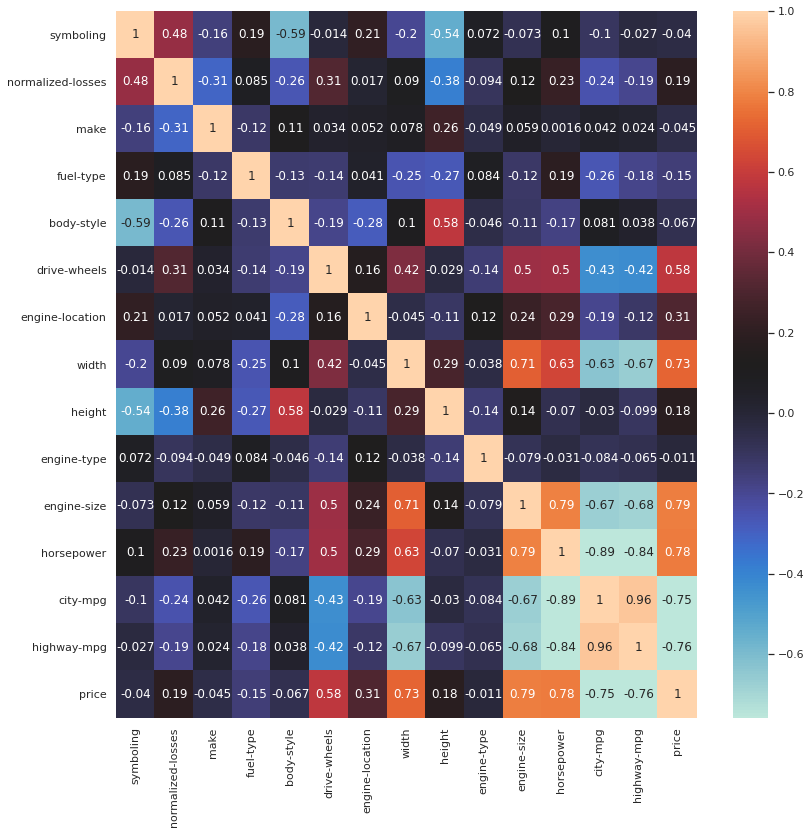

In [1170]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot=True, robust=True, cmap='icefire')
plt.show()

Columns ordered in high corr to low corr:
1. drive-wheels, width, engine-size, horsepower, city-mpg, highway-mpg
2. normalized-losses, engine-location, height
3. make, fuel-type

Columns with almost negligible correlation with output column:
1. symboling, body-style, engine-type

In [1171]:
#Since both city-mpg and highway-mpg are similar colmns we can replace em with average_mpg
data.insert(12, 'average_mpg', (df_new['city-mpg'] + df_new['highway-mpg'])/2)

In [1172]:
data.drop(['city-mpg','highway-mpg'],axis=1, inplace=True)

In [1173]:
data.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,average_mpg,price
0,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,24.0,9.510075
1,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,24.0,9.711116
2,1,4.804021,0,1,2,2,0,4.182050,52.4,5,5.023881,5.036953,22.5,9.711116
3,2,5.099866,1,1,3,1,0,4.192680,54.3,3,4.691348,4.624973,27.0,9.543235
4,2,5.099866,1,1,3,0,0,4.195697,54.3,3,4.912655,4.744932,20.0,9.767095


In [1174]:
#Height and width can also be combined and taken as size
#data['size'] = data['height'] * data['width']
#data.drop(['height','width'], axis=1, inplace=True)

Since multiplying height and width did not make much sense for a car we skipped the step. It was also reducing our r2_score

In [1175]:
le.fit(df['make'])
lst = le.transform(df['make'])
lst_inverse = le.inverse_transform(lst)
lst = list(set(lst))
lst_inverse = list(set(lst_inverse))

res = {} 
for key in lst: 
    for value in lst_inverse: 
        res[key] = value 
        lst_inverse.remove(value) 
        break
res

{0: 'porsche',
 1: 'peugot',
 2: 'mazda',
 3: 'mercury',
 4: 'chevrolet',
 5: 'renault',
 6: 'plymouth',
 7: 'nissan',
 8: 'mercedes-benz',
 9: 'toyota',
 10: 'volkswagen',
 11: 'volvo',
 12: 'mitsubishi',
 13: 'jaguar',
 14: 'bmw',
 15: 'saab',
 16: 'audi',
 17: 'alfa-romero',
 18: 'honda',
 19: 'isuzu',
 20: 'dodge',
 21: 'subaru'}

**Model Selection**

In [1176]:
from sklearn.metrics import r2_score

In [1177]:
import statsmodels.api as sm
x = data.drop(['price'], axis=1)
X = sm.add_constant(x)
y = data['price']
X
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     62.90
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           2.64e-60
Time:                        13:45:21   Log-Likelihood:                 42.348
No. Observations:                 197   AIC:                            -56.70
Df Residuals:                     183   BIC:                            -10.73
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.2540      3.50

In [1178]:
x = data.drop(['price'], axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)

print("Bias= ", r2_score(y_train, y_predict_train))
print("Variance= ", r2_score(y_test, y_predict))

Bias=  0.805636762722485
Variance=  0.8258656050011863


In [1179]:
x = data.drop(['price','symboling','normalized-losses','horsepower','body-style','fuel-type','engine-type'], axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)

print("Bias= ", r2_score(y_train, y_predict_train))
print("Variance= ", r2_score(y_test, y_predict))

# If bias > variance, we need regularization.

Bias=  0.7815862120573083
Variance=  0.816628797216196


In [1180]:
x = data.drop(['price','symboling','normalized-losses','horsepower','body-style','fuel-type','engine-type'], axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)

print("Bias= ", r2_score(y_train, y_predict_train))
print("Variance= ", r2_score(y_test, y_predict))

Bias=  0.7827701871598436
Variance=  0.8328641683116941


In [1181]:
X.iloc[:,1:].corr()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,average_mpg
symboling,1.000000,0.482797,-0.155076,0.186260,-0.587742,-0.014313,0.214887,-0.195868,-0.541892,0.072250,-0.072520,0.101115,-0.042164
normalized-losses,0.482797,1.000000,-0.311590,0.085209,-0.260252,0.314930,0.016674,0.090001,-0.382486,-0.094109,0.121854,0.232301,-0.201196
make,-0.155076,-0.311590,1.000000,-0.117173,0.111999,0.034327,0.051915,0.077763,0.262955,-0.049149,0.058531,0.001600,0.003821
fuel-type,0.186260,0.085209,-0.117173,1.000000,-0.131622,-0.135036,0.040628,-0.253454,-0.270287,0.084078,-0.118699,0.192583,-0.233882
body-style,-0.587742,-0.260252,0.111999,-0.131622,1.000000,-0.185474,-0.277870,0.102543,0.575153,-0.045923,-0.112040,-0.171083,0.040141
drive-wheels,-0.014313,0.314930,0.034327,-0.135036,-0.185474,1.000000,0.158734,0.423903,-0.029069,-0.144727,0.495920,0.501598,-0.414764
engine-location,0.214887,0.016674,0.051915,0.040628,-0.277870,0.158734,1.000000,-0.045120,-0.109969,0.121607,0.242828,0.291678,-0.141983
width,-0.195868,0.090001,0.077763,-0.253454,0.102543,0.423903,-0.045120,1.000000,0.289465,-0.037878,0.711171,0.631117,-0.631816
height,-0.541892,-0.382486,0.262955,-0.270287,0.575153,-0.029069,-0.109969,0.289465,1.000000,-0.143959,0.135675,-0.069866,-0.081967
engine-type,0.072250,-0.094109,-0.049149,0.084078,-0.045923,-0.144727,0.121607,-0.037878,-0.143959,1.000000,-0.078896,-0.030831,-0.059170


In [1182]:
from sklearn.metrics import mean_squared_error
x = data.drop(['price','symboling', 'body-style', 'engine-type','make', 'fuel-type'], axis=1) 
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
y_predict_train = lr.predict(x_train)

print("Bias= ", r2_score(y_train, y_predict_train))
print("Variance= ", r2_score(y_test, y_predict))
print("mean_squared_error_train= ",mean_squared_error(y_train, y_predict_train))
print("mean_squared_error_test= ",mean_squared_error(y_test, y_predict))

Bias=  0.7688813518154696
Variance=  0.8295164244433455
mean_squared_error_train=  0.04750227222928645
mean_squared_error_test=  0.03654836448576456


In [1183]:
data.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,average_mpg,price
0,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,24.0,9.510075
1,3,4.804021,0,1,0,2,0,4.160444,48.8,0,4.867534,4.709530,24.0,9.711116
2,1,4.804021,0,1,2,2,0,4.182050,52.4,5,5.023881,5.036953,22.5,9.711116
3,2,5.099866,1,1,3,1,0,4.192680,54.3,3,4.691348,4.624973,27.0,9.543235
4,2,5.099866,1,1,3,0,0,4.195697,54.3,3,4.912655,4.744932,20.0,9.767095


**Feature Selection**

In [1184]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel, SelectKBest
x_train = data.drop(['price'], axis=1)
y_train = data['price']

feature_sel_model = SelectFromModel(Lasso(alpha=0.01, random_state=0))
feature_sel_model.fit(x_train, y_train) 

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [1185]:
feature_sel_model.get_support()

array([False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True])

In [1186]:
select_feat = x_train.columns[(feature_sel_model.get_support())]
print("Total features : {}".format(x_train.shape[1]))
print("Selected features : {}".format(len(select_feat)))
print(select_feat)

Total features : 13
Selected features : 9
Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'height',
       'engine-type', 'engine-size', 'horsepower', 'average_mpg'],
      dtype='object')


**Model**

In [1194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 

x = data[select_feat]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)
print("Mean squared error: {}".format(mean_squared_error(y_test, y_test_predict)))
print("r2_score: {}".format(r2_score(y_test, y_test_predict)))

Mean squared error: 0.03846076893745095
r2_score: 0.8231833315943633


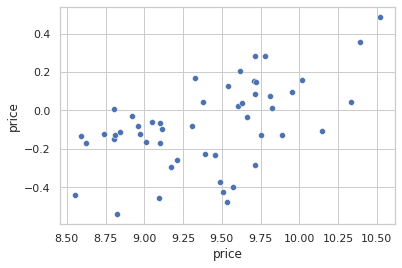

In [1188]:
residuals = y_test - y_test_predict
sns.scatterplot(y_test, residuals)
plt.show()

0.05847888770800291


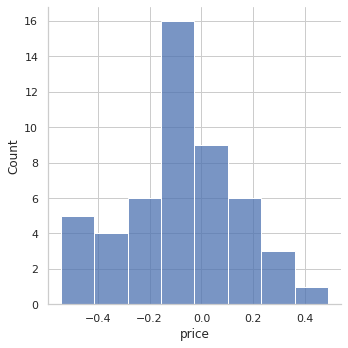

In [1189]:
print(skew(residuals))
sns.displot(residuals)
plt.show()

In [1190]:
x.corr()

,make,fuel-type,body-style,drive-wheels,height,engine-type,engine-size,horsepower,average_mpg
make,1.000000,-0.117173,0.111999,0.034327,0.262955,-0.049149,0.058531,0.001600,0.003821
fuel-type,-0.117173,1.000000,-0.131622,-0.135036,-0.270287,0.084078,-0.118699,0.192583,-0.233882
body-style,0.111999,-0.131622,1.000000,-0.185474,0.575153,-0.045923,-0.112040,-0.171083,0.040141
drive-wheels,0.034327,-0.135036,-0.185474,1.000000,-0.029069,-0.144727,0.495920,0.501598,-0.414764
height,0.262955,-0.270287,0.575153,-0.029069,1.000000,-0.143959,0.135675,-0.069866,-0.081967
engine-type,-0.049149,0.084078,-0.045923,-0.144727,-0.143959,1.000000,-0.078896,-0.030831,-0.059170
engine-size,0.058531,-0.118699,-0.112040,0.495920,0.135675,-0.078896,1.000000,0.791984,-0.664327
horsepower,0.001600,0.192583,-0.171083,0.501598,-0.069866,-0.030831,0.791984,1.000000,-0.854342
average_mpg,0.003821,-0.233882,0.040141,-0.414764,-0.081967,-0.059170,-0.664327,-0.854342,1.000000


Hence this is going to be our final model. 

In [1191]:
y_test = np.exp(y_test)
y_test_predict = np.exp(y_test_predict)

In [1192]:
output_df = pd.DataFrame((y_test))
output_df['Predicted Price'] = y_test_predict
output_df.head(10)

,price,Predicted Price
102,14399.0,21424.234506
124,12764.0,16138.923544
83,14869.0,14509.244357
101,13499.0,20657.498168
169,9989.0,12960.965306
65,18280.0,16916.010441
186,8495.0,9021.479354
91,6649.0,7716.621364
38,9095.0,10013.818081
142,7775.0,8451.562212


In [1193]:
output_df.to_csv('Car Price Prediction.csv')